In [13]:
from sklearn import manifold, datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
data = datasets.load_digits(return_X_y=True)

images, label = data
labels = label.astype(int)

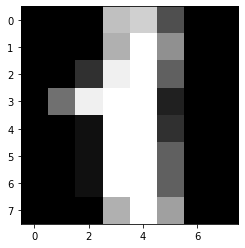

In [7]:
image = images[1, :].reshape(8, 8)
plt.imshow(image, cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=50)
isomap = manifold.Isomap(n_components=2)
transformed_data = tsne.fit_transform(images)
transformed_data_iso = isomap.fit_transform(images)

In [29]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, labels)), columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.head()

iso_df = pd.DataFrame(np.column_stack((transformed_data_iso, labels)), columns=["x", "y", "targets"])
iso_df.head()

,x,y,targets
0,167.628076,23.113202,0.0
1,-47.970144,51.239370,1.0
2,-100.201866,25.911177,2.0
3,45.373440,-67.650232,3.0
4,34.268414,157.094367,4.0


c:\users\shast\venv\data-proj\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


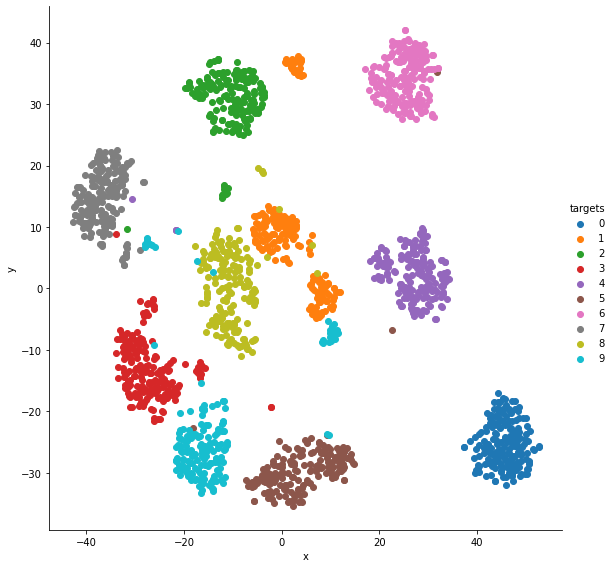

In [30]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()
